In [1]:
import pandas as pd
import numpy as np
import pandas_profiling as pp
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [2]:
data = pd.read_csv("diamonds.csv")

In [3]:
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


* There are no any missing value in the data

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [7]:
data.shape

(53940, 10)

In [8]:
data.cut.value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [9]:
data.color.value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [10]:
data.clarity.value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

In [11]:
# Calling categorical columns as cat & continous variables as cont
cont=[ "carat","depth","table",'x', 'y','z','price']
cat=['cut','color', 'clarity']

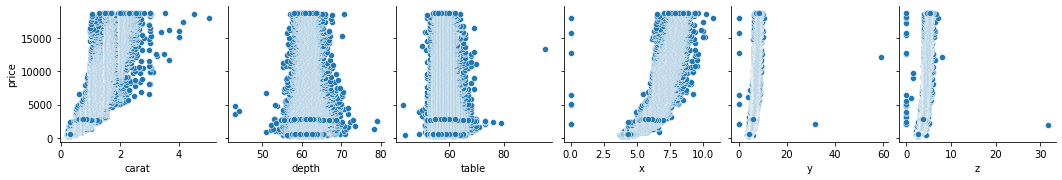

In [12]:
sns.pairplot(x_vars=[ "carat","depth","table",'x', 'y','z'],y_vars="price",data=data)
plt.show()

In [13]:
data.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


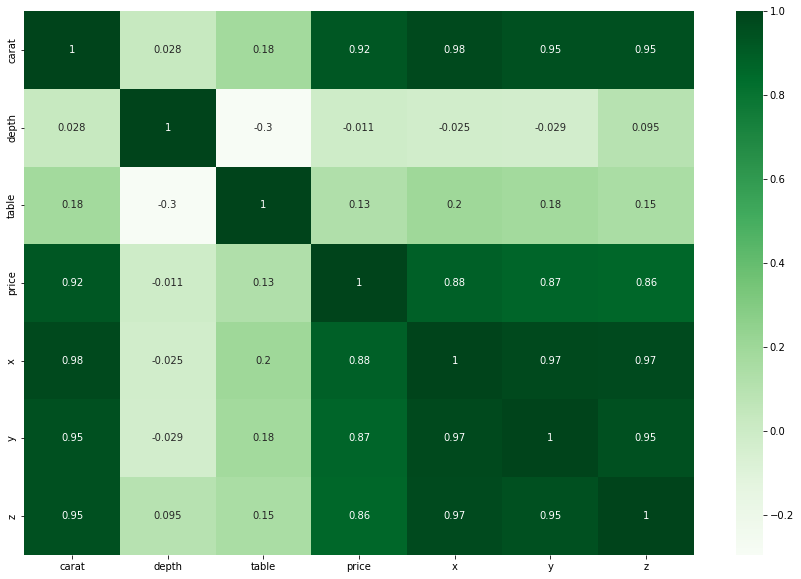

In [14]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True,cmap='Greens')
plt.show()

### Take aways from heatmap:

* Strongest correlation between "x" & "y" that is 0.98.
* Good correlation between "price" and "carat" that is 0.92
* Poor correlation between "depth" and "price" that is -0.11
* Poor correlation between "table" and "price" that is 0.13.

### Analysis on Categorical variables:

#### For Variable "cut"

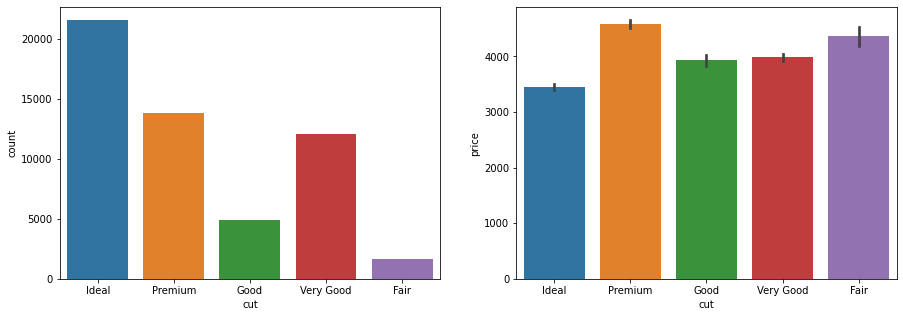

In [15]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.countplot(x = data["cut"])

plt.subplot(122)
sns.barplot(x=data["cut"],y=data["price"])
plt.show()

#### For Variable "color"

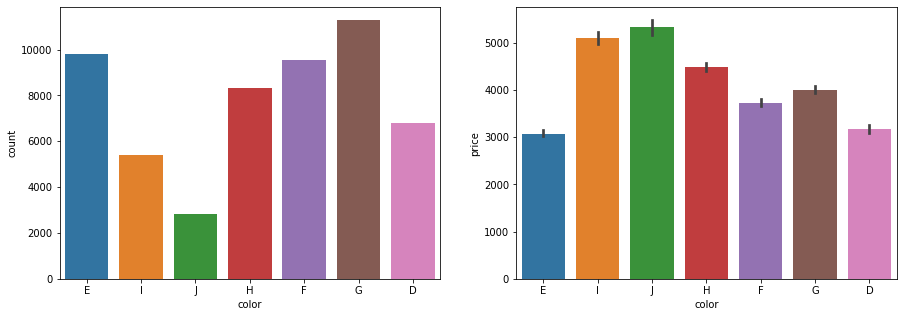

In [16]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.countplot(x = data["color"])

plt.subplot(122)
sns.barplot(x=data["color"],y=data["price"])
plt.show()

#### For Variable "clarity"

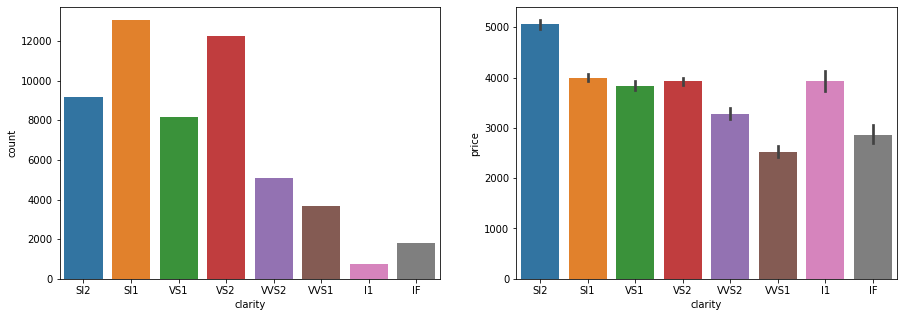

In [17]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.countplot(x = data["clarity"])

plt.subplot(122)
sns.barplot(x=data["clarity"],y=data["price"])
plt.show()

* Cut type- Even Ideal cut type diamonds are high in the dataset, it doesn't have high price in total.
* Cut type- Even Fair diamonds are least in the dataset, it secures 2nd position in total price distribution of cut category.
* Cut type- Premium cut type diamonds in the dataset have high price in total.
* Color type- J type has least in number of diamonds in dataset, but it has high price in total price distribution.
* Color type- G type are maximum in number in dataset but it doesnot have high price in total price distribution in the dataset.
* Clarity type- L1 diamonds are least in number in the dataset but it considerably has high price in total price distribution of clarity type diamonds.
* Clarity type- Sl1 diamonds are maximum in the dataset but it doesn't have high price in total price distribution of clairty type diamonds.

### Coding of categorical variable

In [18]:
# Creating dummies for 3 categorical variables and dropping th first reductant variable.
cut=pd.get_dummies(data["cut"],drop_first=True)
color=pd.get_dummies(data["color"],drop_first=True)
clarity=pd.get_dummies(data["clarity"],drop_first=True)

In [19]:
df = pd.concat([cut,color,clarity,data],axis=1)

In [20]:
pd.set_option("max_columns",None)

In [21]:
df.sample(10)

,Good,Ideal,Premium,Very Good,E,F,G,H,I,J,IF,SI1,SI2,VS1,VS2,VVS1,VVS2,carat,cut,color,clarity,depth,table,price,x,y,z
6382,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0.25,Premium,E,VVS2,62.0,59.0,576,4.05,4.08,2.52
2220,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0.90,Premium,I,VS1,60.7,58.0,3145,6.30,6.19,3.79
38492,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0.42,Premium,F,VS1,61.2,58.0,1031,4.82,4.86,2.96
53242,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0.71,Very Good,G,SI1,57.5,61.0,2644,5.91,5.96,3.41
35606,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0.31,Very Good,H,VVS1,63.3,56.0,907,4.32,4.30,2.73
44880,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0.50,Premium,G,VS1,60.7,62.0,1629,5.10,5.08,3.09
50700,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0.56,Premium,F,VVS2,59.5,61.0,2290,5.36,5.33,3.18
43256,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0.42,Premium,G,IF,61.6,58.0,1400,4.76,4.79,2.94
39286,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0.30,Ideal,H,VS2,62.1,56.0,491,4.32,4.34,2.69
33565,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0.39,Good,E,VS2,63.1,56.0,830,4.63,4.69,2.94


In [22]:
df.drop(cat,axis=1,inplace=True)

In [23]:
df.shape

(53940, 24)

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
# df_train,df_test=train_test_split(df,train_size=0.7,random_state=100)

In [26]:
# print(df_train.shape,df_test.shape)

In [27]:
x = df.drop(["price"],axis=1)
y = df["price"]

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [29]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(37758, 23) (16182, 23) (37758,) (16182,)


In [30]:
lr = LinearRegression()

In [31]:
model = lr.fit(x_train,y_train)

In [32]:
lin_pred = lr.predict(x_test)

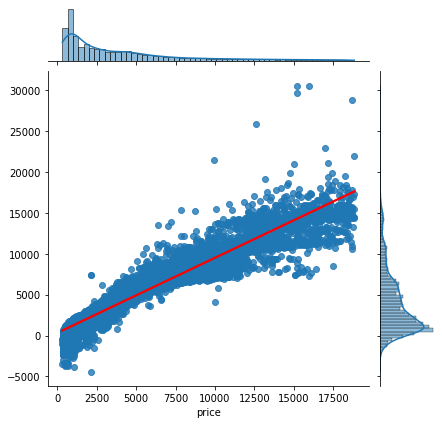

In [33]:
sns.jointplot(x =y_test, y =lin_pred,kind="reg",line_kws = {"color":"red"})
# sns.lineplot()

In [34]:
r_2 = model.score(x_train,y_train)
r_2

0.9195976267987521

In [35]:
print('coefficient of determination:', r_2)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

coefficient of determination: 0.9195976267987521
intercept: 2041.286277769577
slope: [ 5.95521080e+02  8.46196258e+02  7.77769963e+02  7.43301360e+02
 -2.17028968e+02 -2.73303976e+02 -5.00160238e+02 -9.98634669e+02
 -1.47608423e+03 -2.38198979e+03  5.45903730e+03  3.75170967e+03
  2.78194055e+03  4.65783431e+03  4.33672558e+03  5.10133518e+03
  5.02829553e+03  1.12262051e+04 -6.31199113e+01 -2.70960563e+01
 -9.80549238e+02 -5.63315299e+00 -4.81547644e+01]


In [36]:
print('Linear regression accuracy: ')
crossl = cross_val_score(estimator = lr, X = x_train, y = y_train, cv = 4,verbose = 0)
msel = mean_squared_error(y_test, lin_pred)
rmsel = mean_squared_error(y_test, lin_pred)**0.5
mael = mean_absolute_error(y_test, lin_pred)
r2l = r2_score(y_test, lin_pred)

print('Cross val     : ',crossl)
print('MAE           : ', mael)
print('MSE (RMSE)    : ', msel,' (',rmsel,')')
print('R2 score      : ', r2l)

Linear regression accuracy: 
Cross val     :  [0.91970641 0.91241504 0.92164879 0.92200821]
MAE           :  734.2415163929662
MSE (RMSE)    :  1244765.43571587  ( 1115.6905645006907 )
R2 score      :  0.9201866914388086


In [37]:
import statsmodels.api as sm

In [38]:
x_train = sm.add_constant(x_train)

In [39]:
reg = sm.OLS(y_train, x_train)

In [40]:
result = reg.fit()

In [41]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                 1.876e+04
Date:                Sun, 08 May 2022   Prob (F-statistic):               0.00
Time:                        20:21:40   Log-Likelihood:            -3.1921e+05
No. Observations:               37758   AIC:                         6.385e+05
Df Residuals:                   37734   BIC:                         6.387e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2041.2863    485.025      4.209      0.0